In [1]:
setwd("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/MEA-seq/WGCNA_sPLSR/gene_enrichment")

In [2]:
library(tidyverse)
library(dplyr) 
library(ggplot2)
library(ggrepel)
library(tibble)
library(data.table)
library(gprofiler2)
library(stringr)
library(readxl)
library(writexl)
library(reshape2)
library(tidyr)
library(WGCNA)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────

In [3]:
reduced_modules_l_rm<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/WGCNA/GO_enrichment/GO_reduced_All_modules_all_categories_enrichment_reduced_include_all_modules.csv")

In [4]:
freq_WGCNA<-read.table("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/MEA-seq/WGCNA_sPLSR/freq_WGCNA_1C_X40_Y10_10000.txt")
n_boot <- 10000
stable_WGCNA <- freq_WGCNA[freq_WGCNA$Freq >= 0.97*n_boot ,"Var1"]


relevant_modules<-stable_WGCNA
relevant_modules<- sub("^ME", "", relevant_modules)
relevant_modules

[1] "darkmagenta"   "darkorange"    "darkturquoise" "lightcyan"    
[5] "lightgreen"    "orangered4"    "sienna3"

In [5]:
reduced_modules_l_rm<-reduced_modules_l_rm[reduced_modules_l_rm$module %in% relevant_modules,]


In [6]:
func_cat<-c("GO:MF","GO:CC","WP","KEGG")#"GO:BP","HP","GO:BP","WP","KEGG"

reduced_modules_l_rm_func<-reduced_modules_l_rm[reduced_modules_l_rm$source %in% func_cat,]
reduced_modules_l_rm_func<-droplevels(reduced_modules_l_rm_func)
reduced_modules_l_rm_func$module<-factor(reduced_modules_l_rm_func$module)
reduced_modules_l_rm_func$term<-factor(reduced_modules_l_rm_func$term)
#levels(reduced_modules_l_rm_func$module)
reduced_modules_l_rm_func_red<- reduced_modules_l_rm_func %>% group_by(module, source) %>%
  arrange(desc(score)) %>% 
   top_n(3, score) 

In [7]:
reduced_modules_l_rm_func_red<-with(reduced_modules_l_rm_func_red, reduced_modules_l_rm_func_red[order( module,source, -score),])
reduced_modules_l_rm_func_red$term<-factor(reduced_modules_l_rm_func_red$term, levels=unique(reduced_modules_l_rm_func_red$term))
reduced_modules_l_rm_func_red<-droplevels(reduced_modules_l_rm_func_red)

In [8]:
reduced_modules_l_rm_func_red<-reduced_modules_l_rm_func_red %>% mutate(func_cat_col_y = case_when(
    
                               source ==  "GO:BP" ~ "#8B8682",
                               source ==  "GO:MF" ~ "#36648B",
                               source ==  "GO:CC" ~ "#8B2252",
                               source ==  "WP" ~ "#8B8B00",
                               source ==  "KEGG" ~ "#698B69",))
func_cat_col_y<-reduced_modules_l_rm_func_red[!duplicated(reduced_modules_l_rm_func_red$term),]$func_cat_col_y

In [9]:
max_gene<-max(reduced_modules_l_rm_func_red$size)
min_gene<-min(reduced_modules_l_rm_func_red$size)
av_gene=ceiling((max_gene+min_gene)/2)



p<-ggplot(reduced_modules_l_rm_func_red, aes(x=score, y=term, size = size, fill = module,color=module)) + 
 geom_point(shape=21,stroke = 0.5,color="black")+#,color="black"
    scale_fill_manual(values=levels(reduced_modules_l_rm_func_red$module))+
 #scale_color_manual(values=levels(reduced_modules_l_rm_func_red$module))+
# scale_x_continuous(breaks = c(seq(2, 20, 4)),       
 #                    limits = c(1.3, 20))+
 theme_minimal()+ theme(axis.text.y = element_text(colour =func_cat_col_y ,size=14),
                      axis.text.x=element_text(size=14,color="black"),axis.title=element_text(size=14),text=element_text(size=14))+#,face="bold".#
  
    ylab("") +# guides(fill = guide_legend(override.aes = list(size = 5)))+ 
  scale_radius(limits = c(min_gene, max_gene), breaks =c(min_gene,av_gene,max_gene), range = c(5, 10)) 

# tiff("GO_WGCNA_stable_modules.tiff", res = 400, units = "in", width = 12, height = 9)
    
# p
# dev.off()
ggsave("GO_WGCNA_stable_modules.pdf",bg = "transparent",
                  width = 10,   # inches
                  height = 5,   # inches
                plot=p
            )
    

Warning message:
"Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2."


In [10]:
#curated lists

In [11]:
norm_df<-read.table("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/PRPS_voom_norm_control.txt")

In [12]:
gene_lists_path <-"T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/curated_gene_lists/genes_for_enrichment_tests.xlsx"

gene_lists_list <- list()
sheet_names<- excel_sheets(gene_lists_path)
# Loop over each sheet, read it, and add it to the list with the sheet name as the list entry name
for (sheet_name in sheet_names) {
    # Read the sheet into a data frame
    data <- read_excel(gene_lists_path, sheet = sheet_name)
    
    # Assign the data frame to the list with the sheet name as the key
    gene_lists_list[[sheet_name]] <- data
}


In [13]:
gene_trek<-read.table("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/curated_gene_lists/genetrek-data-2024-04-26.tsv",sep="\t",header = TRUE)
gene_trek<-gene_trek[,c(3,13:48)]

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"number of items read is not a multiple of the number of columns"


In [14]:
selected_cat<-c('Gene',
                'Early.onset.or.syndromic.epilepsy.v4...Genomics.England...2023.03.22',
                'Epilepsy.genes.tier.1.doi.org.10.1016.j.ejpn.2022.12.005','Epilepsy.genes.tier.2.doi.org.10.1016.j.ejpn.2022.12.005',
                'Epilepsy.HPO_1250..HPO.release.2024.01.16.','High.Confidence.Epilepsy.Genes',
                'High.Confidence.NDD.genes.v3')
gene_trek<-gene_trek[,selected_cat]

In [15]:
# Create a list of vectors: each vector contains genes where value == "true"
# Make sure Gene is the first column
gene_col <- gene_trek$Gene

# Create a list of vectors: each vector contains genes where value == "true"
gene_sets <- lapply(gene_trek[-1], function(col) {
  gene_col[col == "true"]
})

# Name the list with the original column names (excluding "Gene")
names(gene_sets) <- colnames(gene_trek)[-1]
# Find the maximum column length
max_len <- max(sapply(gene_sets, length))

# Pad each vector with NA to make them equal length
gene_sets_padded <- lapply(gene_sets, function(x) {
  c(x, rep(NA, max_len - length(x)))
})

# Combine into a dataframe
gene_df <- as.data.frame(gene_sets_padded, stringsAsFactors = FALSE)

# Keep original column names (excluding the Gene column)
colnames(gene_df) <- colnames(gene_trek)[-1]

#gene_df

In [16]:
gene_lists_list[["gene_trek"]]<-gene_df

In [17]:
#add HP 
up_TTX_Yuan<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/curated_gene_lists/up_TTX_Veh.csv")
up_TTX_Yuan<-up_TTX_Yuan$x
down_TTX_Yuan<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/curated_gene_lists/down_TTX_Veh.csv")
down_TTX_Yuan<-down_TTX_Yuan$x

In [18]:

gene_sets <-list("up_TTX"=up_TTX_Yuan,"down_TTX"=down_TTX_Yuan)#, "TTX"=c(up_TTX_Yuan,down_TTX_Yuan)


max_len <- max(sapply(gene_sets, length))

# Pad each vector with NA to make them equal length
gene_sets_padded <- lapply(gene_sets, function(x) {
  c(x, rep(NA, max_len - length(x)))
})

# Combine into a dataframe
gene_df <- as.data.frame(gene_sets_padded, stringsAsFactors = FALSE)

# Keep original column names (excluding the Gene column)
colnames(gene_df) <-names(gene_sets)


In [19]:
gene_lists_list[["HP"]]<-gene_df

In [20]:
#adding mroe now
iEEG<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/curated_gene_lists/gene_set_iEEG.csv")
iEEG<-iEEG[iEEG$ModuleName %in% c("WM4","WM11","WM12","WM19","WM21","WM22"), c("Gene","ModuleName")]
# Transform
iEEG_wide <- iEEG %>%
  group_by(ModuleName) %>%
  mutate(row = row_number()) %>%
  pivot_wider(
    names_from = ModuleName,
    values_from = Gene
  ) %>%
  select(-row)


In [21]:
gene_lists_list[["iEEG"]]<-iEEG_wide

In [22]:
relevant_modules<-stable_WGCNA
genes_modules<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/WGCNA/genes_modules_sp16.csv")
rownames(genes_modules)<-genes_modules$X
genes_modules<-genes_modules[-1]
genes_modules$module<-paste0("ME",genes_modules$module)
genes_modules<-genes_modules[genes_modules$module %in% relevant_modules,]
genes_modules<-droplevels(genes_modules)

In [23]:
genes_modules_list<-split(genes_modules, f=genes_modules$module)
genes_modules_list<-lapply(genes_modules_list, function(df) df$gene)
DEGs_list<-genes_modules_list

In [24]:
tested_genes<-rownames(norm_df)


In [25]:
all_results<-list()
for (comparison in names(DEGs_list)){
    DEGs<-DEGs_list[[comparison]]
    
    hyp_results<-list()
    for (hyp in names(gene_lists_list)){
        
        hyp_df<-gene_lists_list[[hyp]]
        df_fisher <- data.frame(gene = tested_genes)
        df_fisher <-df_fisher[!df_fisher$gene == "NA", , drop = FALSE]
        df_fisher <- na.omit(df_fisher)
        df_fisher$DEG<-df_fisher$gene %in% DEGs
        # For each column in `hyp_df`, create a logical vector indicating if each gene in `tested_genes` is present
        for (col in colnames(hyp_df)) {
          # Check if each `tested_genes` entry is in the current column of `hyp_df`
          df_fisher[[col]] <- df_fisher$gene %in% hyp_df[[col]]
        }
        dis_names<-colnames(df_fisher)
        comparisons<-dim(df_fisher)[2]
        only_genes<-list()
        res<-list()
        for (i in 3:comparisons){
            to_test<-table(df_fisher[,2] ,df_fisher[,i])
            only_cat<-df_fisher[,c(1,2,i)]
            int_genes<-only_cat[only_cat[["DEG"]] == TRUE & only_cat[[3]] ==TRUE,"gene"]
            if (length(int_genes)<1){
                int_genes<-c("NA","NA")
            }else{
                int_genes<-int_genes
            }
            
            x<-fisher.test(to_test,alternative="greater")
            p_val<-x$p.value
            int=to_test[2,2]
            
            t_l<-to_test[1,2]+to_test[2,2]
            cat<-dis_names[i]
            #t_l<-length(na.omit(hyp_df[[cat]]))
            res_df<-data.frame("category"=cat,
                              "p_val"=p_val,
                              "intersection"=int,"term_length"=t_l, "DEGs_length"=length(DEGs))
            match <- c(paste0(cat))
            only_genes[[cat]]<-int_genes
            vectors<-list(list(int_genes))
            x_test<-as.data.frame(cbind(match, vectors))
            x_test<- as.data.frame(lapply(x_test, as.character))
            test_2<-left_join(res_df, x_test, by = c("category" = "match"))    
            
            
            res[[dis_names[i]]]<-test_2
            
            }
        res<-do.call(rbind,res)
        res$fdr_adj_pval<-p.adjust(res$p_val, method = "fdr" , n = length(res$p_val))
        res$significant<-ifelse(res$fdr_adj_pval<=0.05, "TRUE", "FALSE")
        res$hypothesis<-hyp
        res$comparison<-comparison
        hyp_results[[hyp]]<-res
        }
    hyp_results<-do.call(rbind,hyp_results)
    all_results[[comparison]]<-hyp_results
    }
all_results<-do.call(rbind,all_results)
all_results$fdr_adj_pval_all_comparisons<-p.adjust(all_results$p_val, method = "fdr" , n = length(all_results$p_val))
all_results$significant_strict_fdr<-ifelse(all_results$fdr_adj_pval_all_comparisons<=0.05,"TRUE", "FALSE")

In [28]:
write.csv(all_results,"enrichment_curated.csv")

In [ ]:
#now plot

In [29]:
data<-read.csv("enrichment_curated.csv")
data$module<-factor(sub("^ME", "", data$comparison))
levels(factor(data$category))

[1] "down_TTX"                                                            
 [2] "Early.onset.or.syndromic.epilepsy.v4...Genomics.England...2023.03.22"
 [3] "Epilepsy.genes.tier.1.doi.org.10.1016.j.ejpn.2022.12.005"            
 [4] "Epilepsy.genes.tier.2.doi.org.10.1016.j.ejpn.2022.12.005"            
 [5] "Epilepsy.HPO_1250..HPO.release.2024.01.16."                          
 [6] "High.Confidence.Epilepsy.Genes"                                      
 [7] "High.Confidence.NDD.genes.v3"                                        
 [8] "Patch_seq_all"                                                       
 [9] "Patch_seq_Cm"                                                        
[10] "Patch_seq_Ina"                                                       
[11] "Patch_seq_Rin"                                                       
[12] "Patch_seq_RMP"                                                       
[13] "up_TTX"                                                              
[14] "WM11"                                                                
[15] "WM12"                                                                
[16] "WM19"                                                                
[17] "WM21"                                                                
[18] "WM22"                                                                
[19] "WM4"

In [30]:
#data<-read.csv("enrichment_iEEG.csv")
#data$module<-factor(sub("^ME", "", data$comparison))
data <- read.csv("enrichment_curated.csv") %>%
  filter(intersection > 0)   # <-- remove zeros
data$module<-factor(sub("^ME", "", data$comparison))

#data$source<-factor(data$category)
data$score<- -log10(data$p_val)
score_cut<- -log10(0.05)

data$category<-factor(data$category, levels=c('Patch_seq_all', 'Patch_seq_Cm','Patch_seq_Ina','Patch_seq_Rin','Patch_seq_RMP',
                                                    'up_TTX','down_TTX',
                                                'Early.onset.or.syndromic.epilepsy.v4...Genomics.England...2023.03.22','High.Confidence.Epilepsy.Genes','Epilepsy.HPO_1250..HPO.release.2024.01.16.',
                                                'Epilepsy.genes.tier.1.doi.org.10.1016.j.ejpn.2022.12.005','Epilepsy.genes.tier.2.doi.org.10.1016.j.ejpn.2022.12.005',
                                                'High.Confidence.NDD.genes.v3',
                                             'WM4','WM11','WM12','WM19','WM21','WM22'),
                         labels=c('Patch_seq', 'Patch_seq_Cm','Patch_seq_Ina','Patch_seq_Rin','Patch_seq_RMP',
                                 'up_HP','down_HP',
                                 'Epilepsy_EO', 'Epilepsy_HC','Epilepsy_HPO',
                                 'Epilepsy_T1','Epilepsy_T2',
                                 'NDD_HC',
                                             'iEEG_WM4','iEEG_WM11','iEEG_WM12','iEEG_WM19','iEEG_WM21','iEEG_WM22'))

In [31]:
max_gene<-max(data$intersection)
min_gene<-min(data$intersection)
av_gene=ceiling((max_gene+min_gene)/2)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


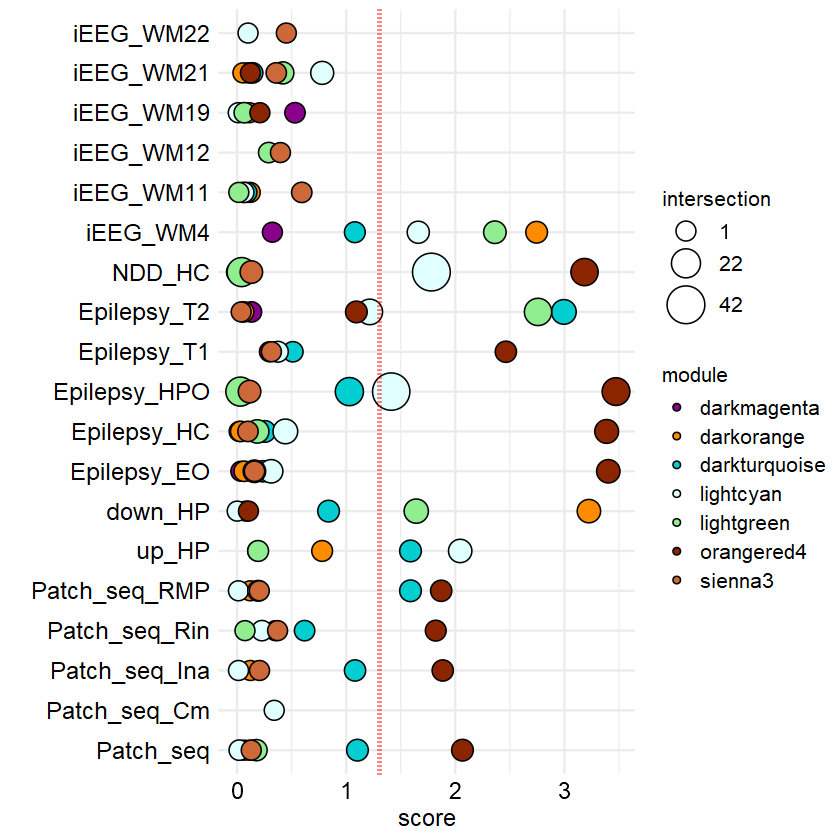

In [32]:
p<-ggplot(data, aes(x=score, y=category, size = intersection, fill = module,color=module)) + 
 geom_point(shape=21,stroke = 0.5,color="black")+#,color="black"
    scale_fill_manual(values=levels(data$module))+
 #scale_color_manual(values=levels(reduced_modules_l_rm_func_red$module))+
# scale_x_continuous(breaks = c(seq(2, 20, 4)),       
 #                    limits = c(1.3, 20))+
 theme_minimal()+
  theme(
    text = element_text(color = "black", size = 14),        # all text black
    axis.text.x = element_text(color = "black", size = 14),
    axis.text.y = element_text(color = "black", size = 14),
    axis.title = element_text(color = "black", size = 14),
    legend.text = element_text(color = "black", size = 12),
    legend.title = element_text(color = "black", size = 12)
  ) +
  ylab("") +
  scale_radius(limits = c(min_gene, max_gene), 
               breaks = c(min_gene, av_gene, max_gene), 
               range = c(5, 10))  +
  geom_vline(xintercept = score_cut, linetype = "dotted", color = "red", size = 1)
p
ggsave("enrichment_curated.pdf",bg = "transparent",
                  width = 6,   # inches
                  height = 5,   # inches
                plot=p
            )

In [33]:
freq_MEA<-read.table("T:/PIgroup Nael NadifKasri/RNAseq/Analysis_2024/MEAseq_all/Output/PRPS_integration/normalized_control_substract/WGCNA/sp16/MEA_divide_log2/PLSR/UMAP_WGCNA/freq_MEA_1C_X40_Y10_10000.txt")
stable_MEA <-freq_MEA[freq_MEA$Freq >= 0.1*n_boot ,"Var1"]


In [35]:
#corr per variable
#MEASEQ
mea_traits<-read.csv('T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/MEA-seq/patients_normalized_hier_PC13.csv')
rownames(mea_traits)<-mea_traits$sample
mea_traits<-mea_traits[-1]

mea_traits$Phenotype_Well_Label <-paste0(mea_traits$Phenotype,"_",mea_traits$Well_Label)


mea_seq_samples<-mea_traits$sample
rownames(mea_traits)<-mea_traits$sample
mea_traits_noMeta<-mea_traits[,stable_MEA]
mea_traits_noMeta <-mea_traits_noMeta[, !names(mea_traits_noMeta) %in% "hier_clust"]  # Remove using a condition

norm_df<-read.table("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/PRPS_voom_norm_control.txt")
norm_df_samples<-gsub("\\.", "-", colnames(norm_df))
colnames(norm_df)<-norm_df_samples
samples_info<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/RNAseq_data/samples_info.csv")
samples_info$Well_ID <- sub(".*_", "", samples_info$sample)
rownames(samples_info)<-samples_info$sample
sampleTable<-samples_info


In [36]:
gsg <- goodSamplesGenes(t(norm_df))
summary(gsg)

gsg$allOK

table(gsg$goodGenes)
table(gsg$goodSamples)

 Flagging genes and samples with too many missing values...
  ..step 1


            Length Class  Mode   
goodGenes   20548  -none- logical
goodSamples    38  -none- logical
allOK           1  -none- logical

[1] TRUE


 TRUE 
20548 


TRUE 
  38 

In [37]:
norm_df <- norm_df[gsg$goodGenes == TRUE,]


In [38]:
norm.counts<-t(norm_df)

In [39]:
#genes to plot!
to_plot<-all_results[all_results$p_val<= 0.05,] #not adjusted, mention in methods
gene_list <- lapply(to_plot$vectors, function(x) eval(parse(text = x)))
gene_list<-unique(unlist(gene_list))


In [40]:
#first we need the relevant metrics per module
relevant_modules<-stable_WGCNA

module_eigengenes<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/WGCNA/module_eigengenes_NT_signed_sp16.csv")
rownames(module_eigengenes)<-module_eigengenes$X
module_eigengenes<-module_eigengenes[-1]
module_eigengenes_ex<-module_eigengenes[mea_seq_samples,]
genes_modules<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/RNA-seq/PRPS_integration_neurons/WGCNA/genes_modules_sp16.csv")
rownames(genes_modules)<-genes_modules$X
genes_modules<-genes_modules[-1]

In [41]:
# Define numbers of genes and samples
nModules <- ncol(module_eigengenes_ex)
nMetrics <- ncol(mea_traits_noMeta)
numb_of_traits=length(mea_traits_noMeta)
nModules
nMetrics

[1] 50

[1] 15

In [42]:
est_list<-list()
pval_list<-list()
for (i in 1:nMetrics){
    est <- c()
    p <- c()
    for (j in 1:nModules){
    s_corr<-cor.test(mea_traits_noMeta[[i]],module_eigengenes_ex[[j]],method = 'spearman',exact = FALSE)
    p_val<-s_corr$p.value
    estimate<-unname(s_corr$estimate)
     est[j]<- estimate  
     p[j]<- p_val  
    }
    est_list[[i]]<-est
    pval_list[[i]]<-p
    }
names(est_list)<-colnames(mea_traits_noMeta)
names(pval_list)<-colnames(mea_traits_noMeta)

In [43]:
est_list<-do.call(cbind,est_list)
pval_list<-do.call(cbind,pval_list)
rownames(est_list)<-colnames(module_eigengenes_ex)
rownames(pval_list)<-colnames(module_eigengenes_ex)
all_adj<-round(p.adjust(c(pval_list), method ="fdr", n = length(c(pval_list))),3)
all_adj<-split(all_adj,ceiling(seq_along(all_adj) / nModules))
all_adj<-as.data.frame(t(do.call(rbind, all_adj)))
rownames(all_adj)<-rownames(pval_list)
colnames(all_adj)<-colnames(pval_list)
all_adj<-as.matrix(all_adj)

In [44]:
module.trait.corr.pvals<-all_adj#but these are fdr normalized
module.trait.corr<-est_list
modules<-rownames(module.trait.corr)
module.trait.corr_m<-as.data.frame(melt(module.trait.corr))
module.trait.corr.pvals_m<-as.data.frame(melt(module.trait.corr.pvals))
colnames(module.trait.corr_m)<-c("module", "trait", "corr")
colnames(module.trait.corr.pvals_m)<-c("module", "trait", "pvalue")
module.trait.corr.pvals_m$pvalue<-round(module.trait.corr.pvals_m$pvalue,2)

significant_modules_corr_m<-unique(module.trait.corr.pvals_m[module.trait.corr.pvals_m$pvalue <= 0.05,"module"])
significant_modules_corr_m
significant_metric<-unique(module.trait.corr.pvals_m[module.trait.corr.pvals_m$pvalue <= 0.05,"trait"])
significant_metric<-droplevels(significant_metric)

[1] MEdarkgreen       MEskyblue         MEmagenta         MEgrey60         
 [5] MEyellowgreen     MEplum2           MEsaddlebrown     MEsienna3        
 [9] MEdarkorange      MEdarkmagenta     MEtan             MEbrown4         
[13] MEblack           MElightcyan1      MEdarkturquoise   MElightcyan      
[17] MEivory           MEturquoise       MElightsteelblue1 MEsalmon         
[21] MEred             MEdarkred         MEpurple          MEgreenyellow    
[25] MEdarkolivegreen  MElightgreen      MEorangered4      MEbisque4        
[29] MEblue            MEplum1           MEdarkgrey        MEfloralwhite    
[33] MEwhite           MEroyalblue       MEmediumpurple3   MEdarkorange2    
[37] MEorange          MEgreen           MEsteelblue       MEgrey           
50 Levels: MEsteelblue MEblack MEfloralwhite MEdarkgreen MEsalmon ... MEgrey

In [45]:
significant_modules_v<-as.vector(significant_modules_corr_m)
significant_modules_v<-gsub("ME", "", significant_modules_v) 
significant_modules_ME<-as.vector(significant_modules_corr_m)
all_significant_metrics<-as.vector(significant_metric)

In [46]:
significant_modules_v
length(all_significant_metrics)

[1] "darkgreen"       "skyblue"         "magenta"         "grey60"         
 [5] "yellowgreen"     "plum2"           "saddlebrown"     "sienna3"        
 [9] "darkorange"      "darkmagenta"     "tan"             "brown4"         
[13] "black"           "lightcyan1"      "darkturquoise"   "lightcyan"      
[17] "ivory"           "turquoise"       "lightsteelblue1" "salmon"         
[21] "red"             "darkred"         "purple"          "greenyellow"    
[25] "darkolivegreen"  "lightgreen"      "orangered4"      "bisque4"        
[29] "blue"            "plum1"           "darkgrey"        "floralwhite"    
[33] "white"           "royalblue"       "mediumpurple3"   "darkorange2"    
[37] "orange"          "green"           "steelblue"       "grey"

[1] 15

In [47]:
gsub("ME", "", relevant_modules)  %in% significant_modules_v

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [48]:
sig_module_and_trait<-list()
for (ME in significant_modules_ME){
    ME_m<-gsub("ME", "", ME) 
    sig_module_and_trait[[ME_m]]<-as.vector(module.trait.corr.pvals_m[module.trait.corr.pvals_m$module==ME & module.trait.corr.pvals_m$pvalue<=0.05,"trait"]) #why dont 0.05?
}

In [ ]:
sig_module_and_trait[gsub("ME", "", relevant_modules)]

In [49]:
sig_module_and_trait_compact<-compact(sig_module_and_trait)
l<-max(unlist(lapply(sig_module_and_trait_compact, length)))
for (c in names(sig_module_and_trait_compact)){
    v<-sig_module_and_trait_compact[[c]]
    vl<-length(v)
    r<-l-vl
    v<-c(v,rep(NA,r))
    sig_module_and_trait_compact[[c]]<-v
}
sig_module_and_trait_compact<-do.call(cbind,sig_module_and_trait_compact)
write.csv(sig_module_and_trait_compact,"sig_module_and_trait_v2.csv")

In [50]:
sig_module_and_trait_compact<-data.frame(sig_module_and_trait_compact)

In [51]:
modules_to_plot<-to_plot$comparison
modules_to_plot_noME<-unique(gsub("ME", "", modules_to_plot))
modules_to_plot_noME

[1] "darkorange"    "darkturquoise" "lightcyan"     "lightgreen"   
[5] "orangered4"

In [52]:
all_significant_metrics_compact<-sig_module_and_trait_compact[,modules_to_plot_noME]
all_significant_metrics_compact<-unique(na.omit(unlist(all_significant_metrics_compact)))
all_significant_metrics_compact

[1] "EB_Dur"               "EB_Dur_Std"           "EB_ISI"              
 [4] "EB_prop"              "EB_rate_Std"          "hfNB_and_NB_prop"    
 [7] "IEBI_CV"              "IEBI_Std"             "NB_dur"              
[10] "Firing_Rate_in_NB_Hz" "hfNB_rate"            "INBI_Std"            
[13] "Spikes_per_EB"        "NB_prop"

In [53]:
est_list<-list()
pval_list<-list()
nMetrics<-length(all_significant_metrics_compact)
the_samples_order<-rownames(mea_traits_noMeta)

norm.counts_df<-as.data.frame(norm.counts)
norm.counts_df = norm.counts_df[match(the_samples_order, rownames(norm.counts_df)),]
norm.counts_df_compact<-norm.counts_df[,gene_list]
nGenes<-length(gene_list)
mea_traits_noMeta<-mea_traits_noMeta[,all_significant_metrics_compact]

In [54]:
for (i in all_significant_metrics_compact){
    est <- c()
    p <- c()
    for (j in colnames(norm.counts_df_compact)){
    s_corr<-cor.test(mea_traits_noMeta[[i]],norm.counts_df[[j]],method = 'spearman',exact = FALSE)
    p_val<-s_corr$p.value
    estimate<-unname(s_corr$estimate)
     est[j]<- estimate  
     p[j]<- p_val  
    }
    est_list[[i]]<-est
    pval_list[[i]]<-p
    }
est_list<-do.call(cbind,est_list)
pval_list<-do.call(cbind,pval_list)
all_adj<-round(p.adjust(c(pval_list), method ="fdr", n = length(c(pval_list))),3)
all_adj<-split(all_adj,ceiling(seq_along(all_adj) / nGenes))
all_adj<-as.data.frame(t(do.call(rbind, all_adj)))
rownames(all_adj)<-rownames(pval_list)
colnames(all_adj)<-colnames(pval_list)
all_adj<-as.matrix(all_adj)
all_adj_gene_metric<-as.data.frame(all_adj)
pval_list_gene_metric<-as.data.frame(pval_list)
est_list_gene_metric<-as.data.frame(est_list)

In [55]:
# Global correlation range
all_corrs <- unlist(lapply(rownames(to_plot), function(enrichment) {
  df <- to_plot[enrichment,]
  module <- df$comparison
  module_no_ME <- gsub("ME", "", module)
  genes <- unlist(eval(parse(text = df$vectors)))
  metrics <- na.omit(sig_module_and_trait_compact[[module_no_ME]])
  as.vector(est_list_gene_metric[genes, metrics])
}))
cor_range <- range(all_corrs, na.rm = TRUE)

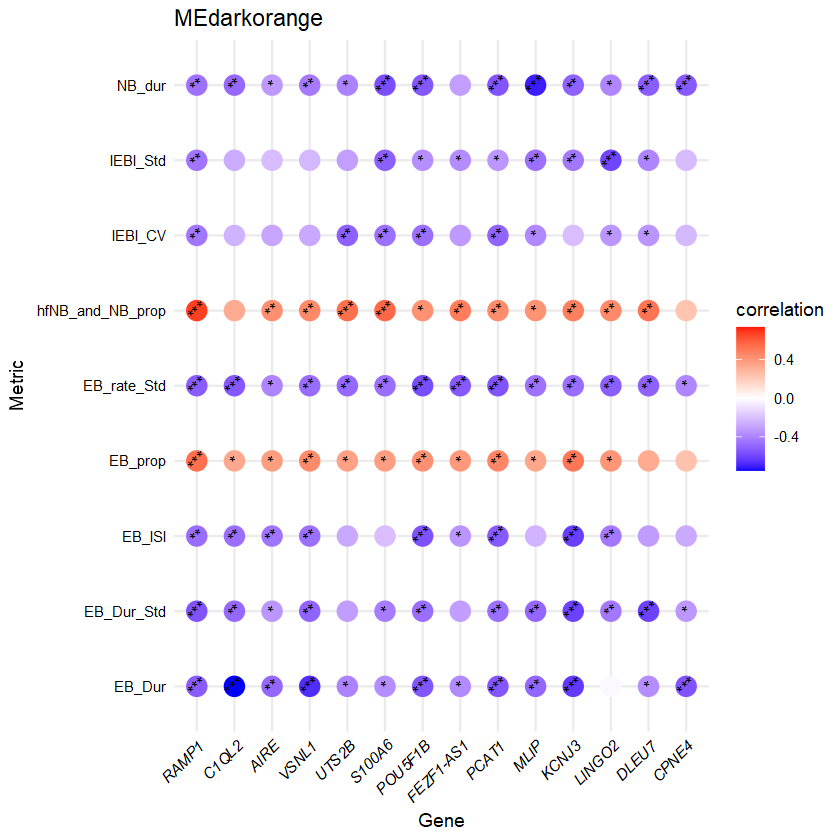

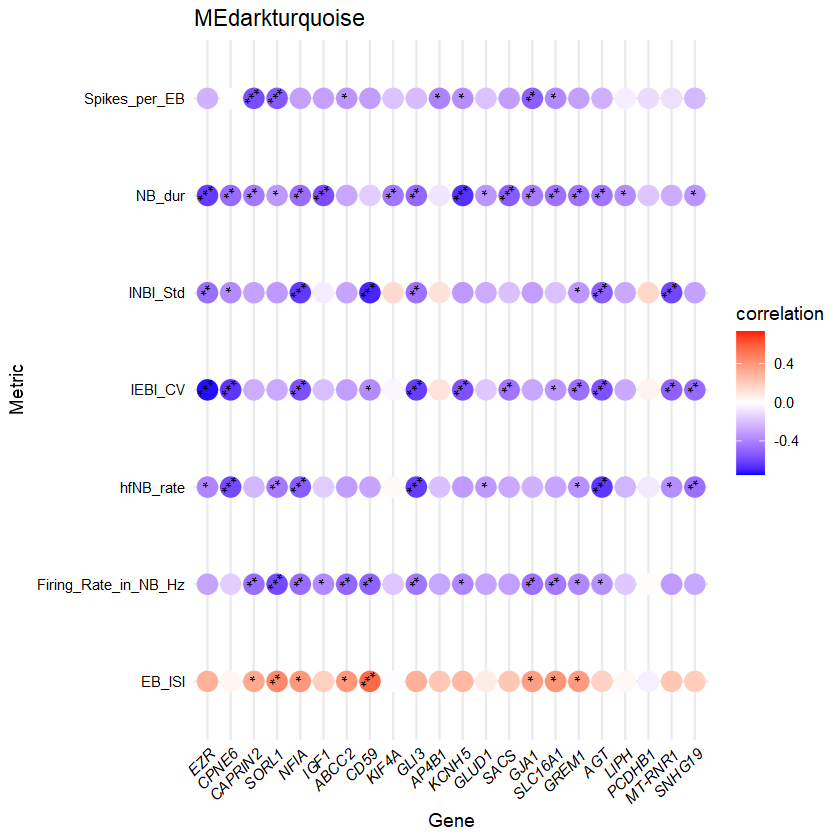

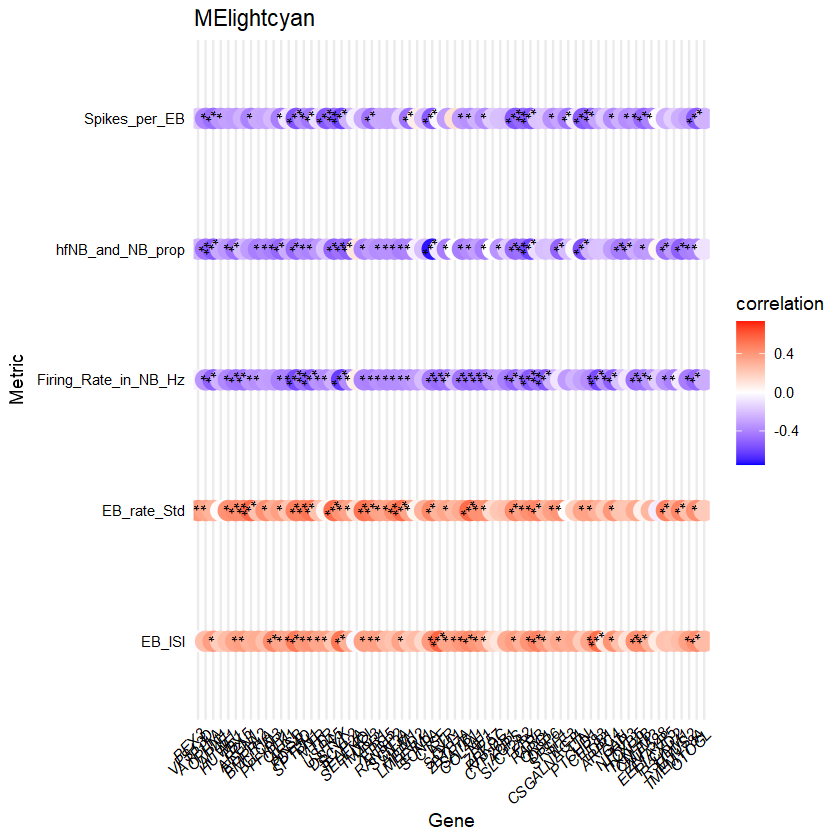

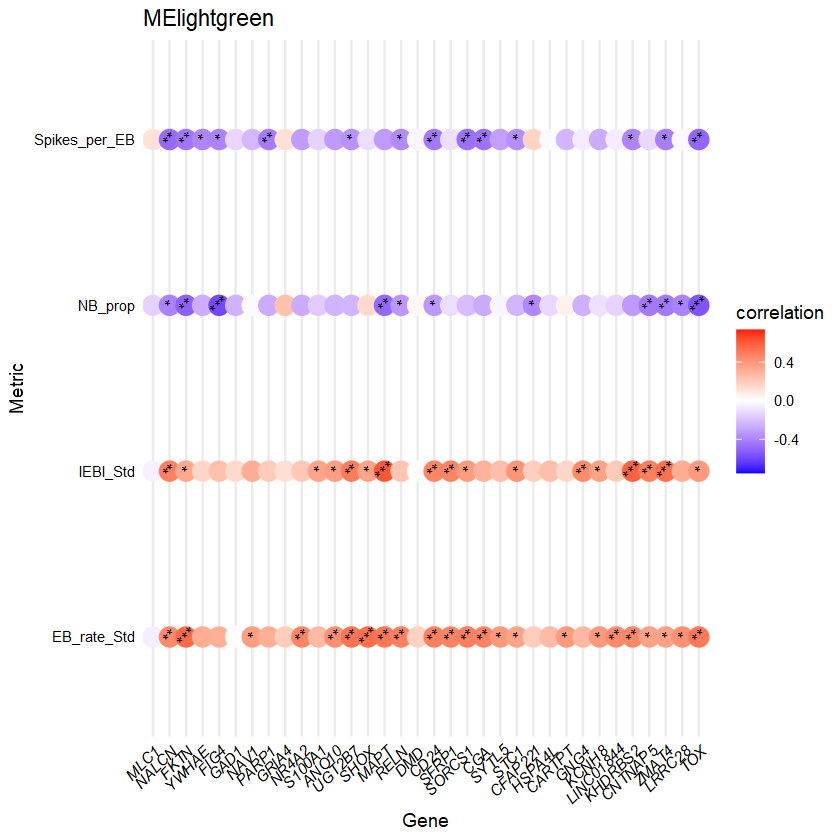

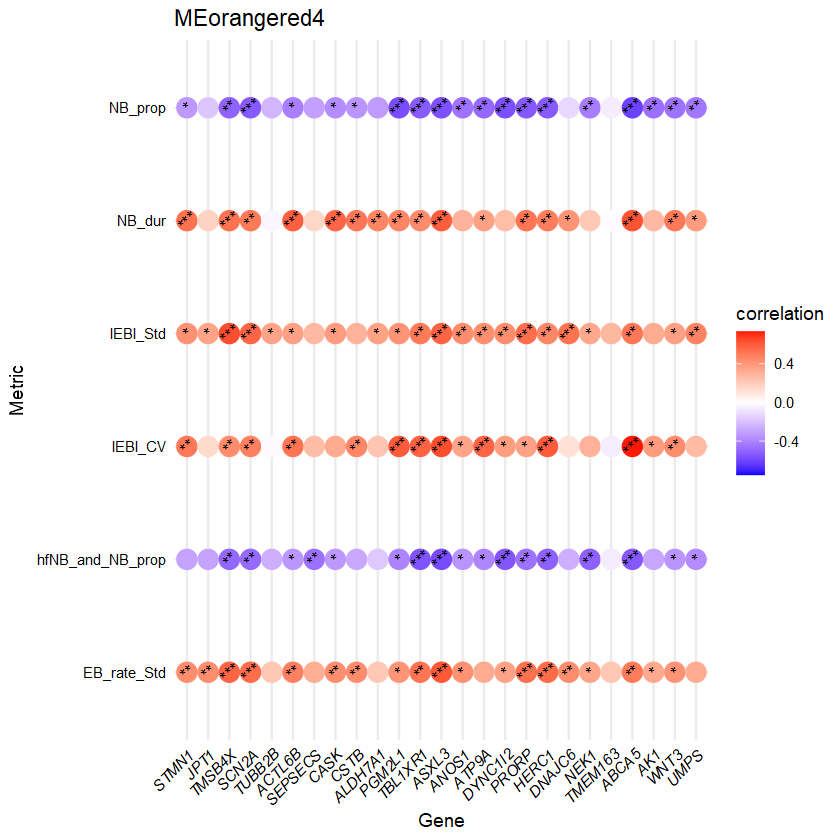

In [56]:

modules <- unique(to_plot$comparison)

for (module in modules) {
  module_no_ME <- gsub("ME", "", module)
  df <- to_plot[to_plot$comparison == module, ]

  # Collect and flatten gene list, dropping NAs and empties
  genes <- lapply(df$vectors, function(x) {
  if (is.na(x) || x == "") return(NA)
  eval(parse(text = x))
  })

  genes <- unlist(genes)
  genes <- genes[!is.na(genes) & genes != ""]

  metrics <- na.omit(sig_module_and_trait_compact[[module_no_ME]])

  valid_genes <- intersect(genes, rownames(est_list_gene_metric))
    if (length(valid_genes) == 0) {
      warning(paste("No valid genes found for module:", module))
      next
    }
    
  corr  <- est_list_gene_metric[valid_genes, metrics, drop = FALSE]
  pvals <- pval_list_gene_metric[valid_genes, metrics, drop = FALSE]


  # Convert matrices to long format
  corr_long <- as.data.frame(corr) %>%
    mutate(gene = rownames(corr)) %>%
    pivot_longer(cols = all_of(metrics), names_to = "metric", values_to = "correlation")

  # pval_long <- as.data.frame(pvals) %>%
  #   mutate(gene = rownames(pvals)) %>%
  #   pivot_longer(cols = all_of(metrics), names_to = "metric", values_to = "pval") %>%
  #   mutate(pval = round(pval, 2))
# Add significance stars instead of numeric p-values
  pval_long <- as.data.frame(pvals) %>%
      mutate(gene = rownames(pvals)) %>%
      pivot_longer(cols = all_of(metrics), names_to = "metric", values_to = "pval") %>%
      mutate(signif = case_when(
        pval <= 0.001 ~ "***",
        pval <= 0.01  ~ "**",
        pval <= 0.05  ~ "*",
        TRUE ~ ""
      ))

  # Join correlation and pval
  plot_df <- left_join(corr_long, pval_long, by = c("gene", "metric"))

  # --- FIX ordering without NA levels ---
  present_genes <- intersect(unique(genes), unique(plot_df$gene))
  plot_df$gene <- factor(plot_df$gene, levels = valid_genes)
  plot_df$metric <- factor(plot_df$metric, levels = metrics)

  # --- Smarter size estimates with MIN values ---
  small <- 0.2
  big   <- 0.6
  small_h <- 0.2
  big_h  <- 0.2
  n_metrics <- length(metrics)
  n_genes   <- length(present_genes)

  height_est <- ifelse(n_metrics > 10, n_metrics * big_h, n_metrics * big_h)
  width_est  <- ifelse(n_genes   > 10, n_genes   * small, n_genes   * big)

  # Enforce minimum sizes (good for 1–2 genes/metrics)
  height_est <- max(height_est, 3)   # at least 4 inches tall
  width_est  <- max(width_est, 6)    # at least 6 inches wide

  # --- Plot ---
  p <- ggplot(plot_df, aes(x = gene, y = metric, color = correlation)) +
      geom_point(size = 5) +   
      geom_text(
      aes(label = signif),
      color = "black",
      size = 3.5,
      angle = 45,
      hjust = 0.5,   # keep centered horizontally
      vjust = 0.5    # keep centered vertically
    )+
          # adjust justification so it doesn’t overlap
  scale_color_gradient2(low = "blue", mid = "white", high = "red", limits = cor_range) +
  theme_minimal() +
  labs(title = str_replace_all(module, "\\.", "_"),
       x = "Gene", y = "Metric") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black",face = "italic"  ),
        axis.text.y = element_text(color = "black"),
        axis.title  = element_text(color = "black"),
        plot.title  = element_text(color = "black"),
        legend.text = element_text(color = "black"),
        legend.title= element_text(color = "black"))


  print(p)
  ggsave(paste0(module, "_enrichment.pdf"),
         bg = "transparent",
         width = width_est,
         height = height_est,
         plot = p)
}
